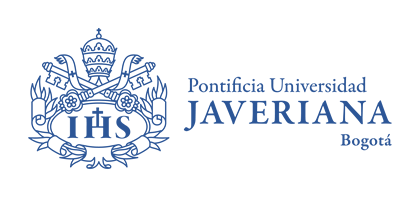

# Aprendizaje de Máquina - Redes neuronales artificiales
## Perceptrón y ADALINE
Este notebook tiene como objetivo familiarizar al estudiante con los modelos de redes neuronales básicos: Perceptrón y ADALINE. Se prueba el desempeño con 2 conjuntos de  datos: linealmente separables y no linealmente separables.


## Setup
Se instalan y se importan las librerías necesarias para el ejercicio

In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import sklearn.datasets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split



In [ ]:
sklearn.__version__

'1.0.2'

## Conjunto de datos - Generación de datos sintéticos

Inicialmente crearemos 2 conjuntos de datos sintéticos, uno linealmente separable y el otro no




In [ ]:
N=300

In [ ]:
# Creación del dataset aleatorio
X_ejemplo1 , y_true = make_blobs(n_samples=N, centers=2,
                       cluster_std=0.4, random_state=0)

In [ ]:
# Intercambio X[0] y X[1]
X_ejemplo1 = X_ejemplo1[:, ::-1] 

In [ ]:
shuffler = np.random.permutation(len(y_true))
X_ejemplo1 = X_ejemplo1[shuffler]
y_true = y_true[shuffler]

In [ ]:
X_ejemplo1

array([[ 0.79788023,  2.39192003],
       [ 3.68587889,  0.57618394],
       [ 5.04349282,  0.80220866],
       [ 1.05826328,  1.1594259 ],
       [ 1.02359054,  1.66682569],
       [ 3.97321191,  0.67836815],
       [ 1.22576279,  1.63341614],
       [-0.16458398,  2.40030593],
       [ 4.79276536,  0.8149993 ],
       [-0.19820721,  2.43248596],
       [ 0.46404901,  1.96745111],
       [ 0.69197007,  1.79184633],
       [ 4.83839851,  1.84156446],
       [ 4.16539462,  0.59389208],
       [ 0.32254707,  1.74960995],
       [ 4.07347214,  1.18469603],
       [ 3.7646837 ,  1.72953036],
       [ 1.86264513,  1.85414084],
       [ 4.12855761,  0.77240921],
       [ 0.82476575,  1.95060934],
       [ 0.88396675,  2.20836049],
       [ 3.91287618,  1.72329327],
       [ 4.02986329,  1.13720674],
       [ 0.96335476,  2.71452149],
       [ 4.71185641,  0.93205382],
       [ 4.75059384,  0.61114119],
       [ 0.45130487,  1.81580595],
       [ 4.63318899,  1.2849863 ],
       [ 1.32876118,

In [ ]:
y_true

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

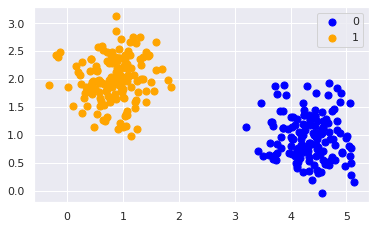

In [ ]:
# Visualizamos los puntos

ax =  plt.gca()
ax.set_aspect('equal', adjustable='box')
for g, col in zip(np.unique(y_true),['blue','orange']):
    ix = np.where(y_true == g)
    ax.scatter(X_ejemplo1[ix,0], X_ejemplo1[ix,1], c = col, label = g, s = 50 )
#ax.scatter(X[:, 0], X[:, 1], s=50,  c=y_true, label=y_true,  cmap='viridis');
ax.legend()


## Generamos segundo dataset

In [ ]:
def twospirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_ejemplo2, y_true2 = twospirals(N)

In [ ]:
shuffler = np.random.permutation(len(y_true2))
X_ejemplo2 = X_ejemplo2[shuffler]
y_true2 = y_true2[shuffler]

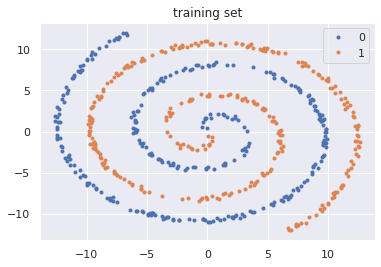

In [ ]:
plt.title('training set')
plt.plot(X_ejemplo2[y_true2==0,0], X_ejemplo2[y_true2==0,1], '.', label=0)
plt.plot(X_ejemplo2[y_true2==1,0], X_ejemplo2[y_true2==1,1], '.', label=1)
plt.legend()
plt.show()

# Tareas: 
* Dividir datasets train - test
* Crear perceptrón simple y probar su desempeño
* Crear ADALINE y probar su desempeño
* Probar ambos modelos con una regresión logística y probar su desempeño

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_ejemplo1, y_true, test_size=0.20, random_state=42)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_ejemplo2, y_true2, test_size=0.20, random_state=42)

In [ ]:
X1_train.shape

(240, 2)

In [ ]:
X1_test.shape

(60, 2)

##  1. Crear  perceptrón simple y probar su desempeño

El primer modelo a probar es un perceptron simple, complete las instrucciones que dicen TODO:

In [ ]:
class Perceptron(object):

    def __init__(self, samples, labels, init_val = None):
        """
        Inicialización del perceptrón 
        Parametros:
        samples -- Conjunto de entrenamiento
        labels -- Etiquetas
        init_val -- Pesos hipótesis inicial
        
        """ 
        ulabels = np.unique(labels)
        
        # se añade un 1 a los ejemplos (folding in)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1) 
        self.labels = labels
        # Inicialización aleatoria (en clase lo hicimos con 0's)
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 20):
        """
        Inicialización del perceptrón 
        Parametros:
        learning_rate -- Paso del ajuste de hipótesis del perceptrón
        iterations -- Epocas 
        
        """ 
        for i in range(iterations):
            errs = 0
            for sample, label, sample_id in zip(self.samples, self.labels, range(0,len(self.labels))):
                f = np.sign(np.dot(sample, self.weights))>0
                if f != label:
                  self.weights += #TODO
                  errs += 1
                  print(f'Error in iteration {i+1} sample id {sample_id}')
                  pass
            if errs == 0:
                print("Found a boundary in %d iterations." % (i + 1))
                return self
            pass
        print("Failed to find a boundary.")
        pass      

    def predict(self, new_samples):
        """
        Función de predicción del perceptrón
        Parametros:
        new_samples -- X

        Returns:
          Labels para los new_samples
        """ 
        #Inserta 1 a los samples
        X = np.insert(new_samples,0,np.ones(new_samples.shape[0]),axis=1)
        
        predicts= #TODO
        return predicts

In [ ]:
p= Perceptron(X1_train,Y1_train)


In [ ]:
p.train()

In [ ]:
p.predict(X1_test)

In [ ]:
Y1_test

Compare utilizando las métricas precision y recall 
https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
p2= Perceptron(X2_train,Y2_train)

In [ ]:
p2.train()

In [ ]:
p.predict(X2_test)

In [ ]:
Y2_test

# 2. Crear modelo ADALINE

El segundo modelo a crear es el modelo ADALINE, complete el siguiente esquema completando las instrucciones TODO:

In [ ]:
class ADALINE(object):

    def __init__(self, samples, labels, init_val = None):
        """
        Inicialización de modelo ADALINE 
        Parametros:
        samples -- Conjunto de entrenamiento
        labels -- Etiquetas
        init_val -- Pesos hipótesis inicial
        
        """ 
        ulabels = np.unique(labels)
        
        # se añade un 1 a los ejemplos (folding in)
        self.samples = np.insert(samples,0,np.ones(samples.shape[0]),axis=1) 
        self.labels = labels
        if init_val is None:
            self.weights = np.random.rand(samples.shape[1] + 1)
        else:
            self.weights = np.full(samples.shape[1] + 1, float(init_val))
        pass

    def train(self, learning_rate = 0.01, iterations = 20):
        """
        Inicialización del perceptrón 
        Parametros:
        learning_rate -- Paso del ajuste de hipótesis del perceptrón
        iterations -- Epocas 
        
        """ 
        for i in range(iterations):
            errs = 0
            for sample, label, sample_id in zip(self.samples, self.labels, range(0,len(self.labels))):
                self.weights += #TODO
                if #TODO:
                  errs += 1
                    print(f'Error in iteration {i+1} sample id {sample_id}')
                    pass
            if errs == 0:
                print("Found a boundary in %d iterations." % (i + 1))
                return self
            pass
        print("Failed to find a boundary.")
        pass      

    def predict(self, new_samples):
        """
        Función de predicción del perceptrón
        Parametros:
        new_samples -- X

        Returns:
          Labels para los new_samples
        """ 
        #Inserta 1 a los samples
        X = np.insert(new_samples,0,np.ones(new_samples.shape[0]),axis=1)
        # Recuerde usar los thresholds para las clases
        predicts= #TODO
        
        return predicts

In [ ]:
a1= ADALINE(X1_train,Y1_train)


In [ ]:
a1.train()

In [ ]:
a1.predict(X1_test)

In [ ]:
Y1_test

Compare utilizando las métricas precision y recall 
https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
a2= ADALINE(X2_train,Y2_train)

In [ ]:
a2.train()

In [ ]:
a2.predict(X2_test)

In [ ]:
Y2_test

##  3. Crear modelo de regresión logística y probar desempeño

Inicialice un modelo de regresión logística y compare contra el modelo de perceptrón y ADALINE con ambos datasets.